In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.listdir('./drive/MyDrive/Data/datajeff/dataset_remove_bg')

['Amanita pantherina',
 'Amanita rubescens',
 'Apioperdon pyriforme',
 'Armillaria borealis',
 'Artomyces pyxidatus',
 'Bjerkandera adusta',
 'Boletus edulis',
 'Boletus reticulatus',
 'Calocera viscosa',
 'Calycina citrina',
 'Cantharellus cibarius',
 'Cetraria islandica',
 'Chlorociboria aeruginascens',
 'Chondrostereum purpureum',
 'Cladonia fimbriata',
 'Cladonia rangiferina',
 'Cladonia stellaris',
 'Clitocybe nebularis',
 'Coltricia perennis',
 'Coprinellus disseminatus',
 'Coprinellus micaceus',
 'Coprinopsis atramentaria',
 'Crucibulum laeve',
 'Daedaleopsis confragosa',
 'Daedaleopsis tricolor',
 'Ganoderma applanatum',
 'Graphis scripta',
 'Gyromitra esculenta',
 'Gyromitra infula',
 'Hygrophoropsis aurantiaca']

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import json

from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_dataset, val_dataset = tf.keras.utils.image_dataset_from_directory(
    './drive/MyDrive/Data/datajeff/dataset_remove_bg',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size = 32,
    image_size=(256,256),
    shuffle=True,
    interpolation='bilinear',
    subset="both",
    validation_split=0.2,
    seed=42,

)

Found 13855 files belonging to 30 classes.
Using 11084 files for training.
Using 2771 files for validation.


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu", input_shape=[256,256, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation="relu", input_shape=[256,256, 3]))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation="relu", input_shape=[256,256, 3]))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation="relu", input_shape=[256,256, 3]))
model.add(Conv2D(filters=256, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation="relu", input_shape=[256,256, 3]))
model.add(Conv2D(filters=512, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=512, activation="relu"))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units=256, activation="relu"))

In [ ]:
model.add(Dense(units=30, activation="softmax"))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

In [ ]:
trained_models = model.fit(x=train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
347/347 [==============================] - 1602s 4s/step - loss: 3.2499 - accuracy: 0.1010 - val_loss: 2.9658 - val_accuracy: 0.1310
Epoch 2/10
347/347 [==============================] - 121s 340ms/step - loss: 2.9463 - accuracy: 0.1469 - val_loss: 2.8556 - val_accuracy: 0.1768
Epoch 3/10
347/347 [==============================] - 119s 339ms/step - loss: 2.7474 - accuracy: 0.2005 - val_loss: 2.8002 - val_accuracy: 0.2299
Epoch 4/10
347/347 [==============================] - 120s 339ms/step - loss: 2.5259 - accuracy: 0.2571 - val_loss: 2.3648 - val_accuracy: 0.3049
Epoch 5/10
347/347 [==============================] - 123s 349ms/step - loss: 2.3182 - accuracy: 0.3063 - val_loss: 2.3000 - val_accuracy: 0.3179
Epoch 6/10
347/347 [==============================] - 119s 339ms/step - loss: 2.1698 - accuracy: 0.3451 - val_loss: 2.3421 - val_accuracy: 0.3219
Epoch 7/10
347/347 [==============================] - 118s 335ms/step - loss: 1.9885 - accuracy: 0.3935 - val_loss: 2.1735 - v

In [ ]:
y_pred = model.predict(val_dataset)

87/87 [==============================] - 20s 231ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(tf.argmax(tf.concat([y for x, y in val_dataset], axis=0), axis=1), tf.argmax(y_pred, axis=1), target_names=val_dataset.class_names))

                             precision    recall  f1-score   support

         Amanita pantherina       0.23      0.13      0.17        67
          Amanita rubescens       0.21      0.36      0.27       100
       Apioperdon pyriforme       0.30      0.33      0.31       203
        Armillaria borealis       0.12      0.11      0.11        57
        Artomyces pyxidatus       0.70      0.82      0.76       170
         Bjerkandera adusta       0.17      0.14      0.15        93
             Boletus edulis       0.43      0.43      0.43       190
        Boletus reticulatus       0.10      0.07      0.08        41
           Calocera viscosa       0.89      0.74      0.81        90
           Calycina citrina       0.67      0.64      0.65       118
      Cantharellus cibarius       0.51      0.64      0.57       165
         Cetraria islandica       0.25      0.51      0.34        97
Chlorociboria aeruginascens       0.90      0.59      0.71        80
   Chondrostereum purpureum      

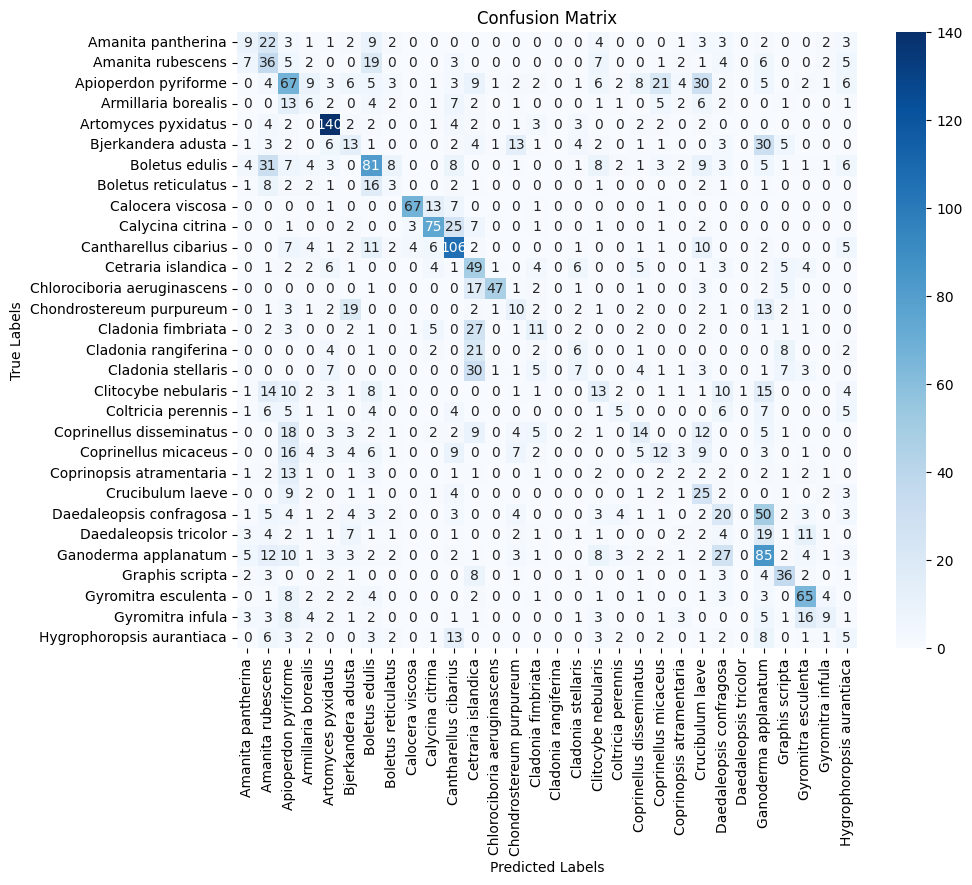

                             precision    recall  f1-score   support

         Amanita pantherina       0.23      0.13      0.17        67
          Amanita rubescens       0.21      0.36      0.27       100
       Apioperdon pyriforme       0.30      0.33      0.31       203
        Armillaria borealis       0.12      0.11      0.11        57
        Artomyces pyxidatus       0.70      0.82      0.76       170
         Bjerkandera adusta       0.17      0.14      0.15        93
             Boletus edulis       0.43      0.43      0.43       190
        Boletus reticulatus       0.10      0.07      0.08        41
           Calocera viscosa       0.89      0.74      0.81        90
           Calycina citrina       0.67      0.64      0.65       118
      Cantharellus cibarius       0.51      0.64      0.57       165
         Cetraria islandica       0.25      0.51      0.34        97
Chlorociboria aeruginascens       0.90      0.59      0.71        80
   Chondrostereum purpureum      

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

true_labels = tf.argmax(tf.concat([y for x, y in val_dataset], axis=0), axis=1)
pred_labels = tf.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(true_labels, pred_labels)

class_names = val_dataset.class_names

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_labels, pred_labels, target_names=class_names))


In [ ]:
model.save('model_epoch_10.keras')

In [ ]:
model.save_weights('model_epoch_10.h5')

In [ ]:
model.load_weights('model_epoch_10.h5')

# Continue training from epoch 10
trained_models_continued = model.fit(x=train_dataset, validation_data=val_dataset, epochs=20, initial_epoch=10)

Epoch 11/20
347/347 [==============================] - 132s 372ms/step - loss: 1.3836 - accuracy: 0.5564 - val_loss: 2.5144 - val_accuracy: 0.3446
Epoch 12/20
347/347 [==============================] - 124s 354ms/step - loss: 1.2555 - accuracy: 0.6032 - val_loss: 2.4435 - val_accuracy: 0.3739
Epoch 13/20
347/347 [==============================] - 122s 347ms/step - loss: 1.1233 - accuracy: 0.6418 - val_loss: 2.7338 - val_accuracy: 0.3656
Epoch 14/20
347/347 [==============================] - 122s 346ms/step - loss: 0.9974 - accuracy: 0.6836 - val_loss: 2.3751 - val_accuracy: 0.3833
Epoch 15/20
347/347 [==============================] - 119s 339ms/step - loss: 0.9167 - accuracy: 0.7068 - val_loss: 3.0465 - val_accuracy: 0.3721
Epoch 16/20
347/347 [==============================] - 120s 339ms/step - loss: 0.8241 - accuracy: 0.7379 - val_loss: 3.0325 - val_accuracy: 0.3706
Epoch 17/20
347/347 [==============================] - 121s 341ms/step - loss: 0.7538 - accuracy: 0.7593 - val_loss: 2

In [ ]:
y_pred = model.predict(train_dataset)

347/347 [==============================] - 87s 246ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(tf.argmax(tf.concat([y for x, y in train_dataset], axis=0), axis=1), tf.argmax(y_pred, axis=1), target_names=train_dataset.class_names))

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

true_labels = tf.argmax(tf.concat([y for x, y in train_dataset], axis=0), axis=1)
pred_labels = tf.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(true_labels, pred_labels)

class_names = train_dataset.class_names

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_labels, pred_labels, target_names=class_names))


VAL


In [ ]:
y_pred = model.predict(val_dataset)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(tf.argmax(tf.concat([y for x, y in val_dataset], axis=0), axis=1), tf.argmax(y_pred, axis=1), target_names=val_dataset.class_names))

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

true_labels = tf.argmax(tf.concat([y for x, y in val_dataset], axis=0), axis=1)
pred_labels = tf.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(true_labels, pred_labels)

class_names = val_dataset.class_names

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_labels, pred_labels, target_names=class_names))


In [ ]:
model.save('model_epoch_10.keras')

In [ ]:
model.save_weights('model_epoch_10.h5')